# Workshop Tutorial: Posteriors & Parameter Uncertainties

In this tutorial we will focus on posterior probability density functions (pdfs), also known as posteriors. These inform us of the parameter distributions that underlie the topology of the parameter space.

We will not be doing any new computations. Instead, we will use the results from our final round of sampling and interpret them in the context of posterior pdfs.

This interactive workshop tutorial covers many of the same topics as the corresponding online tutorial(s):

* [Advanced: EMCEE Sampler](http://phoebe-project.org/docs/2.3/tutorials/emcee.ipynb)
* [Advanced: Convert Posterior Distributions from EMCEE](http://phoebe-project.org/docs/2.3/tutorials/emcee_distributions_convert.ipynb)

As usual, we do the imports first.

In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

And load the [bundle from the previous tutorial](https://github.com/phoebe-project/phoebe2-workshop/raw/2021june/data/synthetic/after_final_round.bundle):

In [2]:
b = phoebe.load('./data/synthetic/after_final_round.bundle')

Let's make sure that this final round looks okay by plotting the trace plots of the parameters and the logprobaility function.

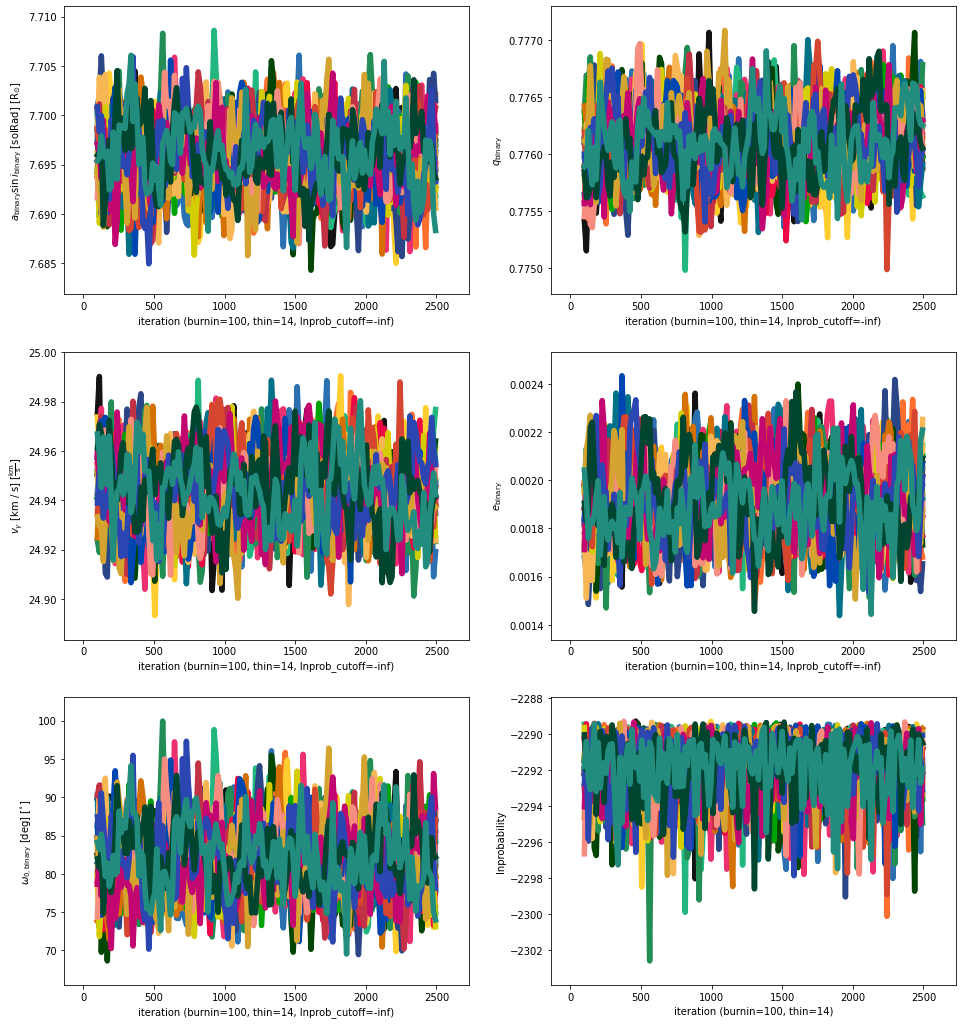

In [3]:
_ = b.plot(solution='final_round', show=True)

This looks good (and converged, which we already know from the convergence analysis if the previous tutorial!) so let's first adopt the final round, including the distributions, which will give us easier access to the parameter posteriors and uncertainties.

In [4]:
b.adopt_solution(solution='final_round',
                 adopt_values=False,
                 adopt_distributions=True,
                 distributions_convert='mvsamples',
                 distribution='ndg_final_mvsamples')

<ParameterSet: 5 parameters | qualifiers: per0, ecc, asini, vgamma, q>

Note that we convert the distributions here to 'mvsamples', meaning we are storing the samples directly. Just for reference, let's look at the other options for this parameter:

In [5]:
b['final_round@distributions_convert'].choices

['mvsamples', 'mvhistogram', 'mvgaussian', 'samples', 'histogram', 'gaussian']

The description has information on what each one of these does. The 'mvhistogram' and 'mvgaussian' options are especially useful for simplified storing of the chains:

In [6]:
b['final_round@distributions_convert'].description

'type of distribution to use when calling adopt_solution, get_distribution_collection, or plot. mvsamples: chains are stored directly and used for sampling with a KDE generated on-the-fly to compute probabilities.  mvhistogram: chains are binned according to distributions_bins and stored as an n-dimensional histogram.  mvgaussian: a multivariate gaussian is fitted to the samples, use only if distribution is sufficiently represented by gaussians.  samples: a univariate representation of mvsamples.  histogram: a univariate representation of mvhistogram.  gaussian: a univariate representation of mvgaussian.'

Let's adopt the solution with a different choice of distributions_convert:

In [7]:
b.adopt_solution(solution='final_round',
                 adopt_values=False,
                 adopt_distributions=True,
                 distributions_convert='mvgaussian',
                 distribution='ndg_final_mvgaussian')

<ParameterSet: 5 parameters | qualifiers: per0, ecc, asini, vgamma, q>

Now let's take a closer look at one of the parameters in the adopted distributions, so that we can follow the logic built into phoebe for these different options:

In [8]:
b['value@ecc@binary@distribution@ndg_final_mvsamples']

<distl.mvsamplesslice dimension=3 samples=[[7.69700698e+00 7.75411103e-01 2.49751147e+01 1.98639378e-03
  8.47324658e+01]
 [7.70084088e+00 7.76001618e-01 2.49388159e+01 1.83139857e-03
  8.74492134e+01]
 [7.69710526e+00 7.75567224e-01 2.49589221e+01 1.71208206e-03
  7.86297938e+01]
 ...
 [7.69339074e+00 7.76506211e-01 2.49191716e+01 1.93904227e-03
  7.75390772e+01]
 [7.69361241e+00 7.76052143e-01 2.49415856e+01 2.09296355e-03
  8.21752369e+01]
 [7.68830747e+00 7.76252179e-01 2.49422197e+01 2.20870789e-03
  7.39785203e+01]] weights=None bw_method=None unit= label=ecc@binary)>

In [9]:
b['value@ecc@binary@distribution@ndg_final_mvgaussian']

<distl.mvgaussianslice dimension=3 mean=[7.695863415988027, 0.7761195533726459, 24.944258796327738, 0.0019234390974422206, 81.74744242551697] cov=[[ 1.06047656e-05  7.28550055e-08 -3.31474298e-06 -3.71360416e-07
   1.14983053e-02]
 [ 7.28550055e-08  8.24364773e-08 -3.39052016e-06 -4.96904058e-09
   2.94296790e-06]
 [-3.31474298e-06 -3.39052016e-06  1.92961393e-04  2.92324556e-07
  -9.04189611e-05]
 [-3.71360416e-07 -4.96904058e-09  2.92324556e-07  2.19019983e-08
  -2.29314099e-04]
 [ 1.14983053e-02  2.94296790e-06 -9.04189611e-05 -2.29314099e-04
   1.79113157e+01]] allow_singular=True unit= label=ecc@binary)>

These structures are inherited from the distl module and you can get even more intimately familiar with them to understand the inner workings of the posterior methods supported in PHOEBE:

In [10]:
help(b['value@ecc@ndg_final_mvsamples@distribution'])

Help on MVSamplesSlice in module phoebe.dependencies.distl.distl object:

class MVSamplesSlice(BaseMultivariateSliceDistribution)
 |  MVSamplesSlice(multivariate, dimension, unit=None, label=None, label_latex=None, wrap_at=None, uniqueid=None)
 |  
 |  Method resolution order:
 |      MVSamplesSlice
 |      BaseMultivariateSliceDistribution
 |      BaseUnivariateDistribution
 |      BaseDistribution
 |      BaseDistlObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  cdf(self, *args, **kwargs)
 |      Expose the cummulative density function (cdf) at values of `x`.
 |      
 |      See [scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.cdf.html)
 |      
 |      This method is just a wrapper around the scipy.stats method on
 |      <<class>.dist_constructor_object> after doing any requested unit-conversions.
 |      
 |      See also:
 |      
 |      * <<class>.logcdf>
 |      * <<class>.pdf>
 |      
 |      Arguments
 |     

In [11]:
help(b['value@ecc@ndg_final_mvgaussian@distribution'])

Help on MVGaussianSlice in module phoebe.dependencies.distl.distl object:

class MVGaussianSlice(BaseMultivariateSliceDistribution)
 |  MVGaussianSlice(multivariate, dimension, unit=None, label=None, label_latex=None, wrap_at=None, uniqueid=None)
 |  
 |  Method resolution order:
 |      MVGaussianSlice
 |      BaseMultivariateSliceDistribution
 |      BaseUnivariateDistribution
 |      BaseDistribution
 |      BaseDistlObject
 |      builtins.object
 |  
 |  Readonly properties defined here:
 |  
 |  dist_constructor_argnames
 |  
 |  dist_constructor_args
 |      Return the arguments to pass to the the underlying distribution
 |      constructor (often the scipy.stats random variable generator function)
 |      
 |      See also:
 |      
 |      * <<class>.dist_constructor_func>
 |      * <<class>.dist_constructor_object>
 |      
 |      Returns
 |      -------
 |      * tuple
 |  
 |  dist_constructor_func
 |      Return the callable function to access the underlying distribution


Now, let's see how we can use these distributions to plot the posterior of a single parameter:

In [12]:
ecc_posterior_samples = b['value@ecc@binary@distribution@ndg_final_mvsamples']
ecc_posterior_mvg = b['value@ecc@binary@distribution@ndg_final_mvgaussian']

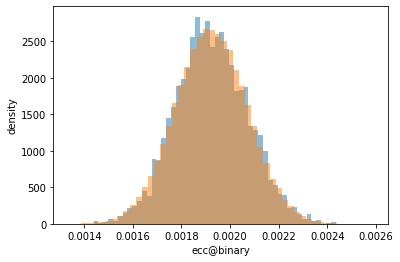

In [13]:
_ = ecc_posterior_samples.plot_sample(bins=50, alpha=0.5)
_ = ecc_posterior_mvg.plot_sample(bins=50, alpha=0.5)

We can see that the posterior with the 'mvsamples' option (blue) is truer to the actual samples distribution, while the 'mvgaussian' one (ornage) is, as expected, more gaussian. Ultimately, we would like to plot a gaussian to either option and we can see that they don't differ significantly for our case (which is good news!)

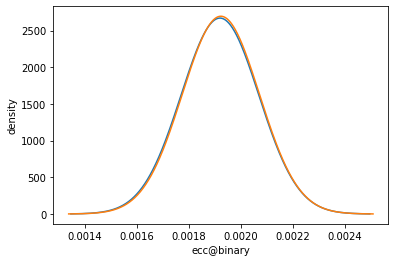

In [14]:
_ = ecc_posterior_samples.plot_gaussian()
_ = ecc_posterior_mvg.plot_gaussian()

We can also use a single `plot()` method to combine the plots and make them even nicer:

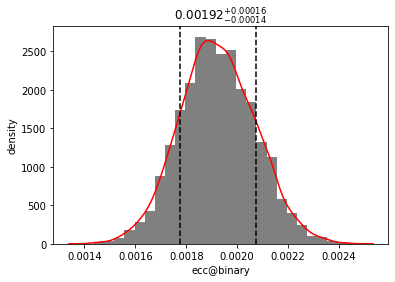

In [15]:
_ = ecc_posterior_samples.plot(plot_pdf=True)

And even update the number of bins in the sample and overplot the Gaussian fit:

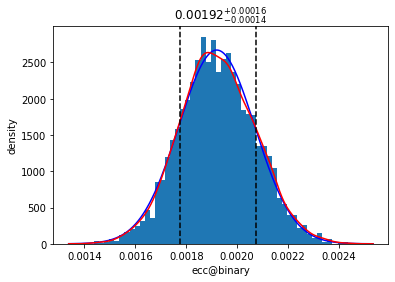

In [16]:
_ = ecc_posterior_samples.plot(plot_sample=True, plot_sample_kwargs={'bins': 50}, plot_gaussian=True, plot_uncertainties=True)

In addition to individual parameter posteriors, it's useful to also look at the corner plot of the entire final sample, which unveils more information on the parameter correlations (the more skewed a 2D posterior is, the more correlated the two parameters are). Let's see the diffrence in the corner plots with the two distributions we adopted:

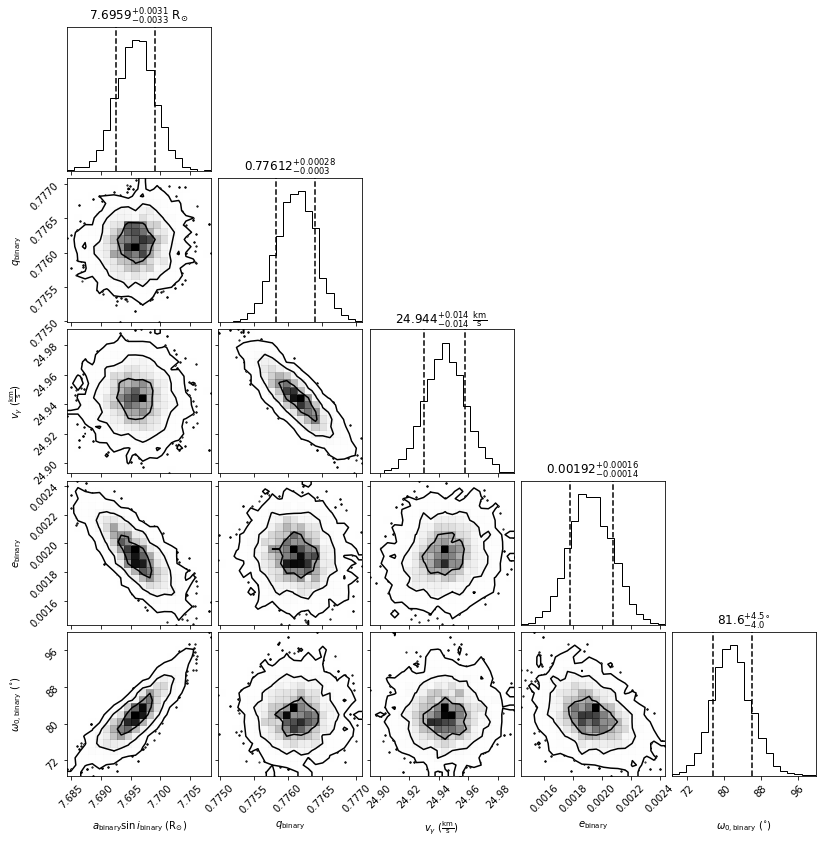

In [17]:
_ = b.plot_distribution_collection('ndg_final_mvsamples')

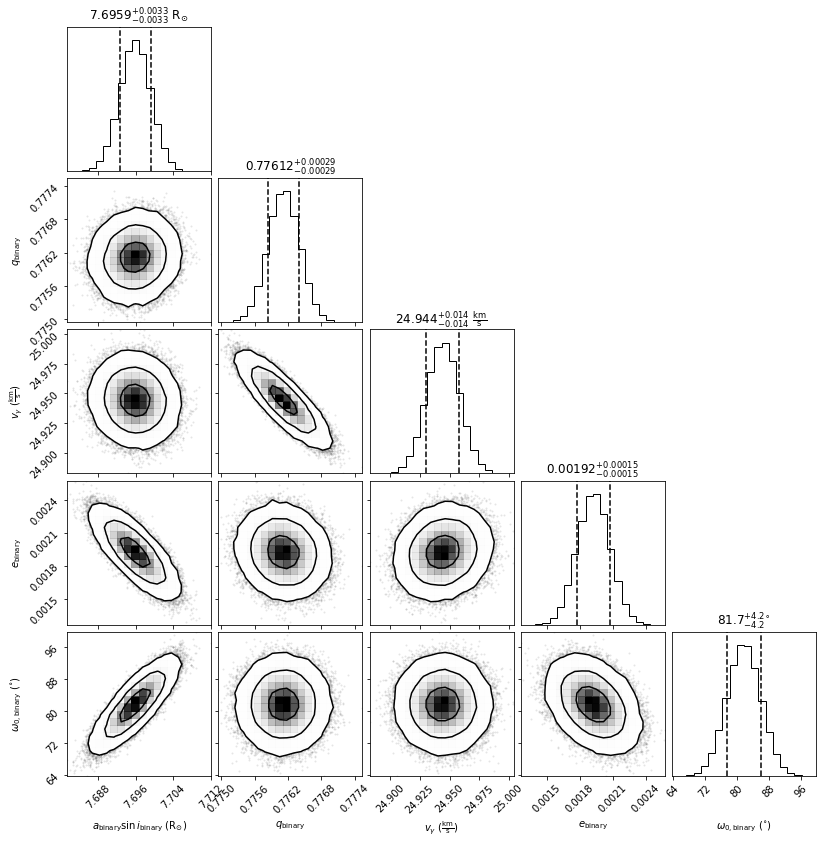

In [18]:
_ = b.plot_distribution_collection('ndg_final_mvgaussian')

We see that the 'mvgaussian' distribution look much nicer than the 'mvsamples' one and that comes directly from the fact that the samples were fitted with Gaussians before we adopted them. This may seem tempting for producing nice plots, but it is considered "tricking/cheating" your results into looking nicer than they actually are, especially if your posteriors are nowhere near Gaussian!

Therefore, to avoid falling into these distribution conversion traps, while keeping the plots nice and smooth, we recommend plotting the corner plot of the solution directly and potentially using smoothing to avoid the choppy look of individual samples:

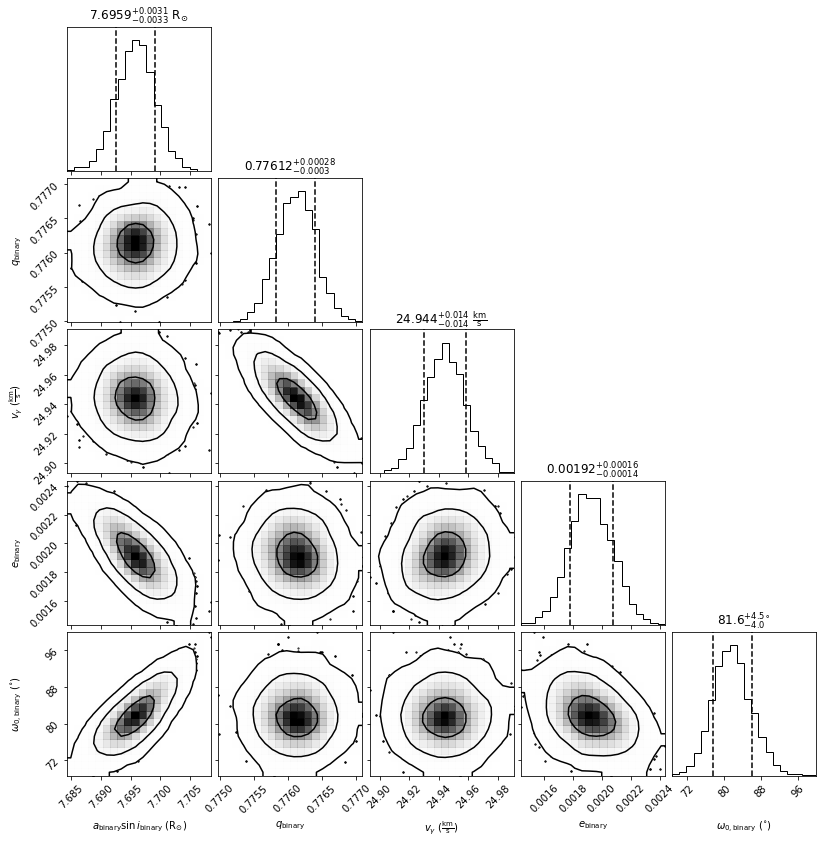

In [19]:
_ = b.plot('final_round', style='corner', smooth=True)

Finally, to view the mean values with their uncertainties outside of a plot, we can call:

In [20]:
b.uncertainties_from_distribution_collection('ndg_final_mvsamples', tex=True)

asini@binary = 7.6959 +0.0031 -0.0033  solRad
 q@binary = 0.77612 +0.00028 -0.0003  
 vgamma = 24.944 +0.014 -0.014  km / s
 ecc@binary = 0.00192 +0.00016 -0.00014  
 per0@binary = 81.6 +4.5 -4.0  deg

## Posterior propagation

The one major benefit of running MCMC with PHOEBE distributions is the option to propagate them through constraints (as we saw in the [distributions tutorial](./Tutorial_07_distributions.ipynb)), which allows us to get posteriors on parameters beyond the ones directly sampled. To achieve this, we can pass `parameters` to propagate this set of distributions through the constraint to any other parameter(s).  
For example, let's see how eccentricity and argument of periastron look in `esinw` and `ecosw` instead.

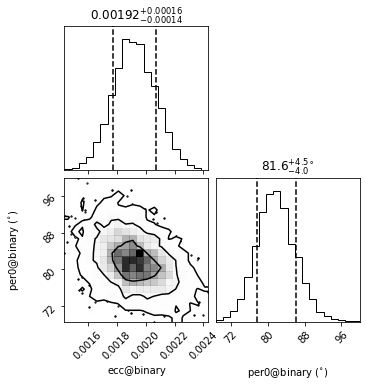

In [21]:
_ = b.plot_distribution_collection(solution='final_round', parameters=['ecc', 'per0'], show=True)

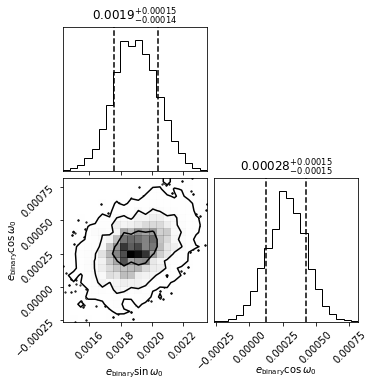

In [22]:
_ = b.plot_distribution_collection(solution='final_round', parameters=['esinw', 'ecosw'], show=True)

And we can also do the same thing as an argument to [uncertainties_from_distribution_collection](http://phoebe-project.org/docs/2.3/api/phoebe.frontend.bundle.Bundle.uncertainties_from_distribution_collection):

In [23]:
b.uncertainties_from_distribution_collection(solution='final_round', parameters=['ecc', 'per0'], tex=True)

ecc@binary = 0.00192 +0.00016 -0.00014  
 per0@binary = 81.6 +4.5 -4.0  deg

In [24]:
b.uncertainties_from_distribution_collection(solution='final_round', parameters=['esinw', 'ecosw'], tex=True)

esinw@binary = 0.0019 +0.00015 -0.00014  
 ecosw@binary = 0.00028 +0.00015 -0.00015  

As we've already seen several times, we can also sample from the posteriors to propagate through the forward model.

In [25]:
b.run_compute(compute='nm_fit', solution='final_round', sample_num=20, model='post_prop')

100%|███████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.00it/s]


<ParameterSet: 13 parameters | kinds: lc, rv>

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


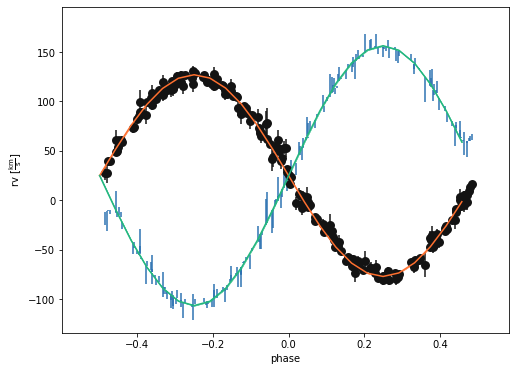

In [26]:
_ = b.plot(model='post_prop', kind='rv', x='phases', show=True)

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*

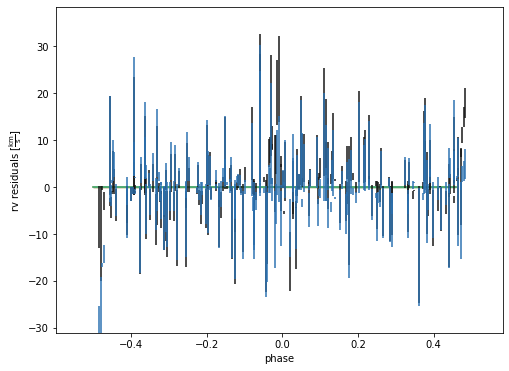

In [27]:
_ = b.plot(model='post_prop', kind='rv', x='phases', y='residuals', show=True)

# Exercises

**Exercise 1**: We used the posterior on eccentricity to discuss what phoebe can do for us. Now run the same type of analysis on other parameters.